In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.ytimg.com/vi/aircAruvnKk/maxresdefault.jpg", width=600, height=200)

### _By: Ankur Patel_

### Exploratory Data Analysis

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
# load and describe dataset
df = pd.read_csv("iris.csv")
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
print(df.head(5))
print(df.tail(5))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [12]:
# list of defined species 
df["species"] = df["species"].map({
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2
}).astype(int)

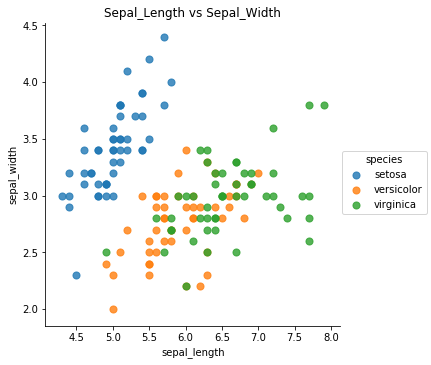

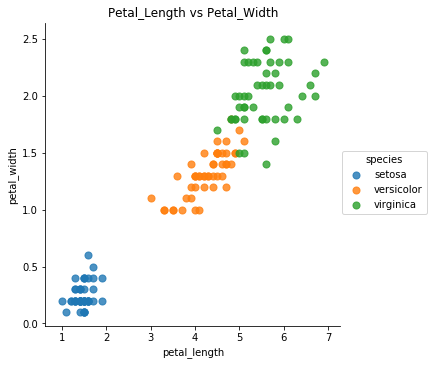

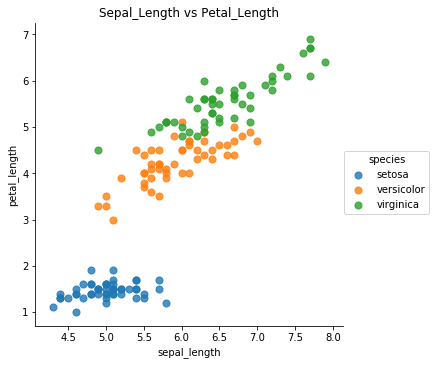

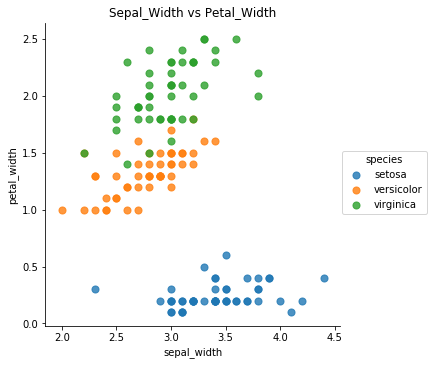

In [60]:
# visualize the dataset
sns.lmplot('sepal_length', 'sepal_width',
           data=df,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal_Length vs Sepal_Width')

sns.lmplot('petal_length', 'petal_width',
           data=df,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('Petal_Length vs Petal_Width')

sns.lmplot('sepal_length', 'petal_length',
           data=df,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal_Length vs Petal_Length')

sns.lmplot('sepal_width', 'petal_width',
           data=df,
           fit_reg=False,
           hue="species",
           scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal_Width vs Petal_Width')
plt.show()

### Review (1.1)

- This is a common beginner's dataset so won't explain much, except that the df will be split into X and y and the X will be standard scaled for values to be in range 0-1.

### Task 1: Iris dataset

- Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified linear nonlinearities on the iris dataset using the keras Sequential interface (https://keras.io/getting-started/sequential-model-guide/). 
- Include code for selecting regularization strength and number of hidden units using GridSearchCV and evaluation on an independent test-set.

### Define model

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import keras #neural network (NN)
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler

In [164]:
# splitting df, scaling X 
X = df.iloc[:,:4]
y = df.iloc[:,4]
X_sc = StandardScaler().fit_transform(X)

In [165]:
# fix random seed for reproducibility
np.random.seed(7)

In [166]:
# one-hot encoded classes
num_classes = 3
y = keras.utils.to_categorical(y, num_classes)

In [167]:
# define baseline model initially with 2 hidden layers
def baseline_model(optimizer='adam', hidden_size=2):
    model = Sequential([
        Dense(hidden_size, input_dim = 4),
        Activation('relu'),
        Dense(3),
        Activation('softmax')
    ])        
    model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

clf = KerasClassifier(baseline_model)

In [168]:
# GridSearchCV 
param_grid = {'epochs' : [1, 2], #iterations on a dataset
              'hidden_size':  [1, 2]} #hidden layers

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid.fit(X_sc, y)

Epoch 1/1
120/120 [==============================] - 0s 2ms/step
Epoch 1/1
120/120 [==============================] - 0s 2ms/step
Epoch 1/1
120/120 [==============================] - 0s 1ms/step
Epoch 1/1
120/120 [==============================] - 1s 7ms/step
Epoch 1/1
120/120 [==============================] - 0s 1ms/step
Epoch 1/1
120/120 [==============================] - 0s 911us/step
Epoch 1/1
120/120 [==============================] - 0s 2ms/step
Epoch 1/1
120/120 [==============================] - 0s 1ms/step
Epoch 1/1
120/120 [==============================] - 0s 781us/step
Epoch 1/1
120/120 [==============================] - 0s 937us/step
Epoch 1/2
120/120 [==============================] - 36s 297ms/step - loss: 1.1039 - acc: 0.2750
Epoch 2/2
120/120 [==============================] - 0s 1000us/step
Epoch 1/2
120/120 [==============================] - 38s 314ms/step - loss: 1.2172 - acc: 0.2250
Epoch 2/2
120/120 [==============================] - 0s 2ms/step
Epoch 1/2
120/120

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000144B23826D8>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 2], 'hidden_size': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
# summarize results
print("Best: %f using %s\n" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("Mean %f, Std (%f) with: %r" % (mean, stdev, param))

Best: 0.400000 using {'epochs': 2, 'hidden_size': 2}

Mean 0.073333, Std (0.130639) with: {'epochs': 1, 'hidden_size': 1}
Mean 0.200000, Std (0.216025) with: {'epochs': 1, 'hidden_size': 2}
Mean 0.093333, Std (0.116237) with: {'epochs': 2, 'hidden_size': 1}
Mean 0.400000, Std (0.309121) with: {'epochs': 2, 'hidden_size': 2}


In [184]:
# validating the test split with higher epochs of 100 and batch_size of 5
model = baseline_model()
model.fit(X_sc, y,
          epochs=100, 
          batch_size=5, #number of samples per gradient update
          validation_split=.1)
print('\nSummary:\n')
model.summary()

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 25s 189ms/step - loss: 0.8635 - acc: 0.6370 - val_loss: 0.7612 - val_acc: 1.0000
Epoch 2/100
135/135 [==============================] - 0s 3ms/step - loss: 0.8247 - acc: 0.6444 - val_loss: 0.7470 - val_acc: 1.0000
Epoch 3/100
135/135 [==============================] - 0s 3ms/step - loss: 0.7879 - acc: 0.6444 - val_loss: 0.7331 - val_acc: 1.0000
Epoch 4/100
135/135 [==============================] - 0s 3ms/step - loss: 0.7548 - acc: 0.6963 - val_loss: 0.7268 - val_acc: 1.0000
Epoch 5/100
135/135 [==============================] - 0s 3ms/step - loss: 0.7234 - acc: 0.7111 - val_loss: 0.7126 - val_acc: 1.0000
Epoch 6/100
135/135 [==============================] - 0s 3ms/step - loss: 0.6947 - acc: 0.7185 - val_loss: 0.7046 - val_acc: 1.0000
Epoch 7/100
135/135 [==============================] - 0s 3ms/step - loss: 0.6692 - acc: 0.7630 - val_loss: 0.6972 - val_acc: 1.0000
Epoch 8/100
135/135 [

Epoch 62/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3022 - acc: 0.9333 - val_loss: 0.4104 - val_acc: 0.9333
Epoch 63/100
135/135 [==============================] - 0s 3ms/step - loss: 0.2995 - acc: 0.9333 - val_loss: 0.3986 - val_acc: 0.9333
Epoch 64/100
135/135 [==============================] - 0s 3ms/step - loss: 0.2969 - acc: 0.9333 - val_loss: 0.3911 - val_acc: 1.0000
Epoch 65/100
135/135 [==============================] - 0s 3ms/step - loss: 0.2946 - acc: 0.9333 - val_loss: 0.3998 - val_acc: 0.9333
Epoch 66/100
135/135 [==============================] - 0s 3ms/step - loss: 0.2918 - acc: 0.9333 - val_loss: 0.3914 - val_acc: 0.9333
Epoch 67/100
135/135 [==============================] - 0s 3ms/step - loss: 0.2891 - acc: 0.9333 - val_loss: 0.3819 - val_acc: 1.0000
Epoch 68/100
135/135 [==============================] - 0s 3ms/step - loss: 0.2866 - acc: 0.9333 - val_loss: 0.3795 - val_acc: 1.0000
Epoch 69/100
135/135 [==============================] - 0s 3ms

In [282]:
# evaluating results
score = model.evaluate(X_sc, y, batch_size=3) 
print("\nTest loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

150/150 [==============================] - 2s 16ms/step

Test loss: 0.224
Test Accuracy: 0.967


### Review (1.2)

- The GridSearchCV of KerasClassifier was ran with different parameters to understand 
- Some parameters took long time, and only the chosen one is displayed
- The epochs takes long time since it iterates over entire x and y data, and even more after StandardScaler 
- As the results show, the best score was 0.4 with 2 hidden layers and 2 epochs (more epochs = higher score)
- It was further evaluated with a test split of 0.1, epochs=100, batch_size=5 to validate the model and it showed 0.963
- It evaluated for 0.967 test accuracy with full scaled X and y

### Task 2: MNIST dataset

- Train a multilayer perceptron on the MNIST dataset using the traditional train/test split as given by mnist.load_data in keras. 
- Use a separate 10000 samples (from the training set) for model selection and to compute learning curves (accuracy vs epochs, not vs n_samples). 
- Compare a “vanilla” model with a model using drop-out. 
- Visualize learning curves for all models. As an estimate, you should expect each model to take less than 30 minutes to train on a CPU.

Tutorial for neural network explanation: https://www.youtube.com/watch?v=aircAruvnKk&t=0s&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2

### Preparing data

In [2]:
# libraries
from keras.datasets import mnist

In [14]:
# loading the MNIST data 
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [207]:
# checking size
mnist_data = [X_train, y_train, X_test, y_test]
mnist_cols = ["X_train","y_train","X_test","y_test"]
for i in range(len(mnist_data)):
    print("{} {}".format(mnist_cols[i], mnist_data[i].shape))

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


AxesImage(54,36;334.8x217.44)


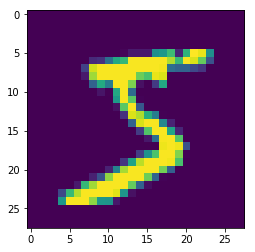

In [238]:
# checking first index
print(plt.imshow(X_train[0]))

In [365]:
# defining function to extract image+name 
def num_img(i):
    img = X_train[i]
    c = y_train[i]
    plt.imshow(img)
    plt.title("Number %d" % (c))
    plt.axis('on')

#defining to get grid of images    
def num_sample(X_train, y_train, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        img = X_train[n+i]
        plt.imshow(img, cmap='gnuplot2')
        plt.title("{}".format(class_name[y_train[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if imfile:
        plt.savefig(imfile)

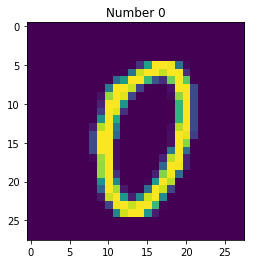

In [366]:
num_img(1000)

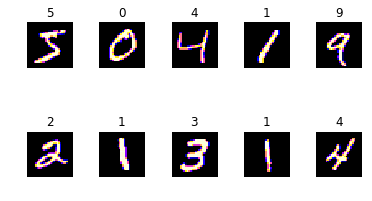

In [368]:
# first 10 images 
num_sample(X_train, y_train, 0, 2, 5)

### Learning curve

In [407]:
# 32 hidden layers
model1 = Sequential([
    Dense(32, input_shape=(784,)), #specify shape first for model to know
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])        

model1 = Sequential()
model1.add(Dense(32, input_dim=784))
model1.add(Activation('relu'))

model1 = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax')
])        

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_724 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_725 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [15]:
# preparing 
X_train = X_train.reshape(60000,784).astype('float32') / 255
X_test = X_test.reshape(10000,784).astype('float32') / 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [378]:
# full dataset
model1.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model1 = model1.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0, callbacks=None, validation_data=(X_test, y_test))

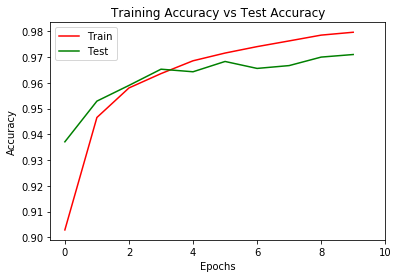

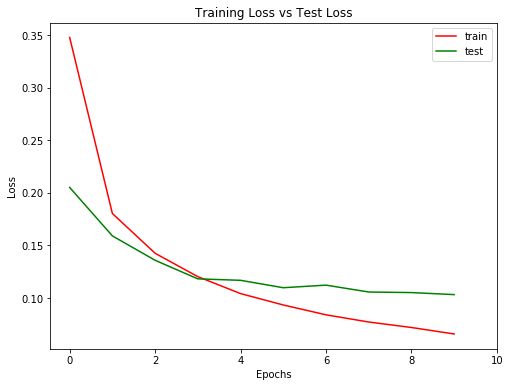

In [380]:
# visualize

# accuracy
plt.figure(0)
plt.plot(model1.history['acc'],'r')
plt.plot(model1.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Test Accuracy")
plt.legend(['Train','Test'])
 
# loss     
plt.figure(1)
plt.plot(model1.history['loss'],'r')
plt.plot(model1.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Test Loss")
plt.legend(['train','test'])
 
plt.show()

In [318]:
# evaluating 60000 train set
score1 = model1.evaluate(X_train, y_train, verbose=0) 
print("\nTrain loss: {:.3f}".format(score1[0]))
print("Train Accuracy: {:.3f}".format(score1[1]))


Train loss: 0.061
Train Accuracy: 0.982


In [317]:
# evaluating test set
score1 = model1.evaluate(X_test, y_test, verbose=0) 
print("\nTest loss: {:.3f}".format(score1[0]))
print("Test Accuracy: {:.3f}".format(score1[1]))


Test loss: 0.109
Test Accuracy: 0.967


#### 10000 train subset

In [16]:
# 10000 for model selection and learning curves
X_train1 = X_train[:10000,:]
y_train1 = y_train[:10000,:]

In [404]:
# 10000 sliced set 
# epochs=100, verbose=1 (silent)
model1.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model1 = model1.fit(X_train1, y_train1, batch_size=32, epochs=100, verbose=1, callbacks=None, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 600s 60ms/step - loss: 0.7401 - acc: 0.8028 - val_loss: 0.3833 - val_acc: 0.8944
Epoch 2/100
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3224 - acc: 0.9126 - val_loss: 0.3071 - val_acc: 0.9142s: 0.3
Epoch 3/100
10000/10000 [==============================] - 14s 1ms/step - loss: 0.2598 - acc: 0.9290 - val_loss: 0.2867 - val_acc: 0.9179
Epoch 4/100
10000/10000 [==============================] - 14s 1ms/step - loss: 0.2268 - acc: 0.9370 - val_loss: 0.2694 - val_acc: 0.9234
Epoch 5/100
10000/10000 [==============================] - 13s 1ms/step - loss: 0.2009 - acc: 0.9438 - val_loss: 0.2623 - val_acc: 0.9236
Epoch 6/100
10000/10000 [==============================] - 13s 1ms/step - loss: 0.1827 - acc: 0.9492 - val_loss: 0.2532 - val_acc: 0.9263
Epoch 7/100
10000/10000 [==============================] - 14s 1ms/step - loss: 0.1622 - acc: 0.9555 - val_loss: 0

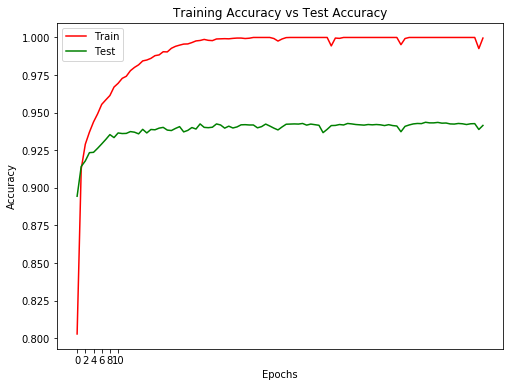

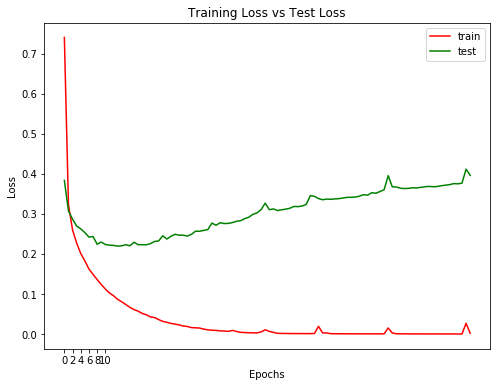

In [405]:
# visualize

# accuracy
plt.figure(0)
plt.plot(model1.history['acc'],'r')
plt.plot(model1.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Test Accuracy")
plt.legend(['Train','Test'])
 
# loss     
plt.figure(1)
plt.plot(model1.history['loss'],'r')
plt.plot(model1.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Test Loss")
plt.legend(['train','test'])
 
plt.show()

In [303]:
# evaluating 10000 train set
score1 = model1.evaluate(X_train1, y_train1, verbose=1) 
print("\nTrain loss: {:.3f}".format(score1[0]))
print("Train Accuracy: {:.3f}".format(score1[1]))

10000/10000 [==============================] - 5s 485us/step

Train loss: 0.031
Train Accuracy: 0.991


In [302]:
# evaluating test set
score1 = model1.evaluate(X_test, y_test, verbose=1) 
print("\nTest loss: {:.3f}".format(score1[0]))
print("Test Accuracy: {:.3f}".format(score1[1]))

10000/10000 [==============================] - 10s 972us/step

Test loss: 0.375
Test Accuracy: 0.945


### Review (2.1)

- The MNIST data of train and test sets of (60000, 28, 28) was converted to (60000, 784) for computing 
- The first index was shown, which read to be either 3 or 5. The pixels can be converted to binary to make it black/white color and can use neural networks to scale the pixels according to the thresholds
- Sequential was ran again with 32 hidden layers and 10 outputs (0-9) and 10 epochs, and its train accuracy was 0.982 and test accuracy was 0.967
- Changed epochs to 100 and verbose to 1, the train accuracy was 0.991 (0.031 loss) and test accuracy was 0.945 (0.375 loss...)
- Epochs plateaued after ~20

### Drop-out

In [17]:
from keras.layers import Dropout

In [21]:
# to avoid overfitting
model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5), #probability too low has minimal effect, too high results in under-learning by the network
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax')
    #max-norm regularization of 4 or 5 can improve results
])

model_dropout.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model_dropout = model_dropout.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 50s 927us/step - loss: 0.2992 - acc: 0.9081 - val_loss: 0.0940 - val_acc: 0.9728
Epoch 2/20
54000/54000 [==============================] - 49s 908us/step - loss: 0.1431 - acc: 0.9559 - val_loss: 0.0772 - val_acc: 0.9760
Epoch 3/20
54000/54000 [==============================] - 49s 901us/step - loss: 0.1135 - acc: 0.9647 - val_loss: 0.0760 - val_acc: 0.9787
Epoch 4/20
54000/54000 [==============================] - 48s 897us/step - loss: 0.0933 - acc: 0.9699 - val_loss: 0.0642 - val_acc: 0.9805
Epoch 5/20
54000/54000 [==============================] - 49s 903us/step - loss: 0.0837 - acc: 0.9729 - val_loss: 0.0592 - val_acc: 0.9818
Epoch 6/20
54000/54000 [==============================] - 49s 905us/step - loss: 0.0746 - acc: 0.9762 - val_loss: 0.0618 - val_acc: 0.9813
Epoch 7/20
54000/54000 [==============================] - 50s 923us/step - loss: 0.0680 - acc: 0.9783 - val_loss: 0.0

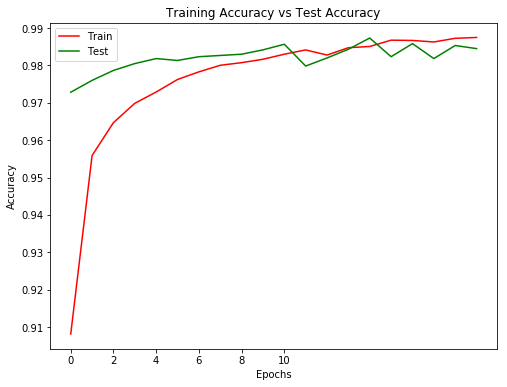

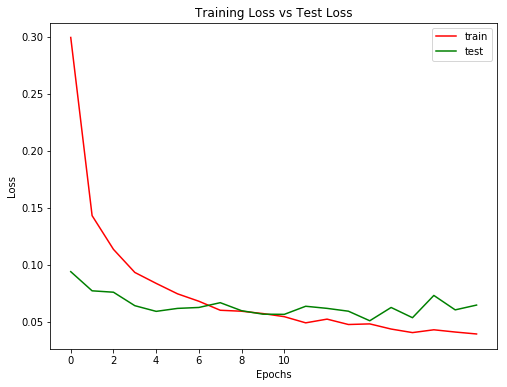

In [22]:
# visualize

# accuracy
plt.figure(0)
plt.plot(model_dropout.history['acc'],'r')
plt.plot(model_dropout.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Test Accuracy")
plt.legend(['Train','Test'])
 
# loss     
plt.figure(1)
plt.plot(model_dropout.history['loss'],'r')
plt.plot(model_dropout.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Test Loss")
plt.legend(['train','test'])
 
plt.show()

In [327]:
# evaluating 10000 train set
score_dropout = model_dropout.evaluate(X_train1, y_train1, verbose=1) 
print("\nTrain loss: {:.3f}".format(score_dropout[0]))
print("Train Accuracy: {:.3f}".format(score_dropout[1]))

10000/10000 [==============================] - 25s 2ms/step

Train loss: 0.007
Train Accuracy: 0.998


In [413]:
# evaluating test set
score_dropout = model_dropout.evaluate(X_test, y_test, verbose=1) 
print("\nTest loss: {:.3f}".format(score_dropout[0]))
print("Test Accuracy: {:.3f}".format(score_dropout[1]))

10000/10000 [==============================] - 9s 909us/step

Test loss: 0.073
Test Accuracy: 0.982


### Confusing matrix, ROC curve

In [32]:
# library
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [33]:
model_pred = model_dropout.predict(X_test, batch_size=32, verbose=1)
model_predicted = np.argmax(model_pred, axis=1)

# confusion matrix
model_cm = confusion_matrix(np.argmax(y_test, axis=1), model_predicted)

10000/10000 [==============================] - 3s 329us/step


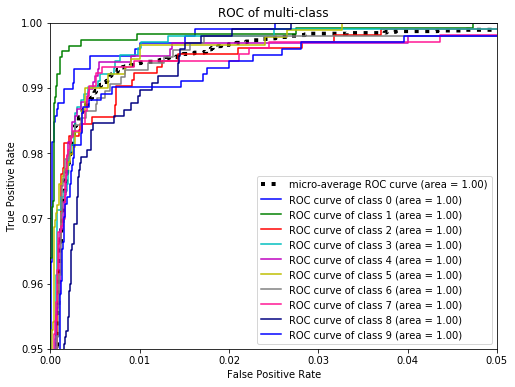

In [69]:
# rate of true positives against false positives (ROC) for multiclass classification
# only displaying micro-average, not macro-average, because it computes the average metric for multiclass

n_classes = 10

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), model_pred.ravel()) #flattened
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.05)
plt.ylim(0.95, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='k', linestyle=':', linewidth=4)

colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'grey', 'deeppink', 'navy'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of multi-class')
plt.legend(loc="lower right")
plt.show()

### Review (2.2)

- The neural net had 32 hidden layers with 10 outputs and 'relu' optimizer, and others were not tried because I used CPU
- The dropout the train accuracy was 0.998 (0.007 loss) and test accuracy was 0.982 (0.073 loss)
- Dropout regulariztion for better generalization and avoiding overfitting
- *I sticked with epochs=20 for dropout because Jupyter crashed with I tried 100* 
- Epochs plateaued after ~10 at 98% accuracy
- The ROC curves also slow the true-positive false-negative relations and since they're very close to 1, the multi-class predictions from model_dropout are accurate!  

### Task 3: SVHN dataset 

- Train a convolutional neural network on the SVHN dataset (http://ufldl.stanford.edu/housenumbers/) in format 2 (single digit classification). 
- You should achieve at least 85% test-set accuracy with a base model. 
- Also build a model using batch normalization. 
- Your final accuracy will be included in the grading.
________________________________________________________________________________________________________________________________

- You can compare against other approaches reported here (http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#5356484e) if you’re curious. 
- You shouldn’t use the “extra” data. On a CPU, each epoch (pass through the training set) can take up to ~40 minutes.


Hint : Make sure you are doing the reshape for the training set correctly. A direct reshape might give you garbled images. Display an image after reshaping to make sure they are correct.

In [ ]:
url = 'http://ufldl.stanford.edu/housenumbers/'

### Task 4: Pets dataset

- Load the weights of a pre-trained convolutional neural network included in keras, see https://keras.io/applications/ , and use it as feature extraction method to train a linear model or MLP (scikit-learn or keras are fine) on the pets dataset (http://www.robots.ox.ac.uk/~vgg/data/pets/). 
- You should achieve at least 70% accuracy. 
- It’s recommended you store the extracted features on disk so you don’t have to recompute them for model selection. 
- You will be working with the 37 class classification task.

Hint : Make sure that you apply the same preprocessing to the images that was applied for training the model.